In [ ]:
import cv2 

img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [1]:
import cv2 
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [4]:
dirname = os.path.join(os.getcwd(),'RedFlores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Users\edgar\OneDrive\Desktop\RedFlores\
c:\Users\edgar\OneDrive\Desktop\RedFlores\daisy 1


: 

# Creamos las etiquetas

In [173]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  61632


In [174]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 daisy
1 magnolia
2 rose
3 sunflower
4 water_lily


In [175]:
# Supongamos que todas las imágenes deben tener la misma forma (por ejemplo, 100x100 píxeles)
target_shape = (90, 90)
 
# Asegúrate de que todas las imágenes tengan la misma forma
images = [cv2.resize(img, target_shape) for img in images]
 
# Ahora convierte la lista en un array NumPy
X = np.array(images, dtype=np.uint8)
y = np.array(labels)
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [176]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (49305, 90, 90, 3) (49305,)
Testing data shape :  (12327, 90, 90, 3) (12327,)


Text(0.5, 1.0, 'Ground Truth : 0')

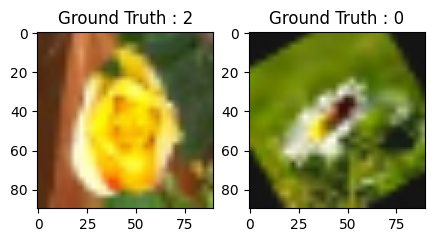

In [177]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

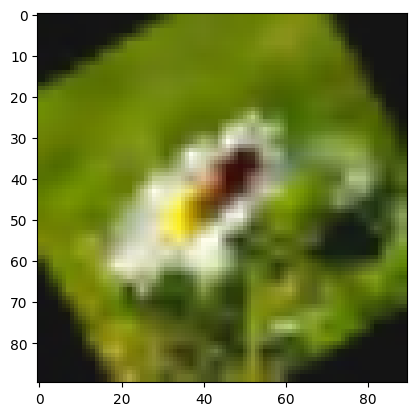

In [178]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [179]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [180]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [181]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(39444, 90, 90, 3) (9861, 90, 90, 3) (39444, 5) (9861, 5)


# Creamos el modelo de CNN

In [203]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [204]:
flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(90,90,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [205]:
flower_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 90, 90, 32)        896       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 90, 90, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 45, 45, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 64800)             0         
                                                                 
 dense_12 (Dense)            (None, 32)                2073632   
                                                      

In [206]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [207]:
tf.config.experimental_run_functions_eagerly(True)

# Entrenamos el modelo: Aprende a clasificar imágenes

In [208]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
617/617 [==============================] - 212s 344ms/step - loss: 1.4209 - accuracy: 0.3869 - val_loss: 1.1953 - val_accuracy: 0.5689
Epoch 2/20
617/617 [==============================] - 216s 350ms/step - loss: 1.2032 - accuracy: 0.5251 - val_loss: 1.0728 - val_accuracy: 0.6053
Epoch 3/20
617/617 [==============================] - 205s 333ms/step - loss: 1.1277 - accuracy: 0.5605 - val_loss: 1.0113 - val_accuracy: 0.6168
Epoch 4/20
617/617 [==============================] - 202s 327ms/step - loss: 1.0842 - accuracy: 0.5825 - val_loss: 0.9752 - val_accuracy: 0.6403
Epoch 5/20
617/617 [==============================] - 201s 326ms/step - loss: 1.0592 - accuracy: 0.5954 - val_loss: 0.9560 - val_accuracy: 0.6436
Epoch 6/20
617/617 [==============================] - 200s 324ms/step - loss: 1.0354 - accuracy: 0.6043 - val_loss: 0.9359 - val_accuracy: 0.6521
Epoch 7/20
617/617 [==============================] - 201s 326ms/step - loss: 1.0173 - accuracy: 0.6120 - val_loss: 0.9200 -

In [209]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("C:\\Users\\edgar\\OneDrive\\Desktop\\flores.h5py")

INFO:tensorflow:Assets written to: C:\Users\edgar\OneDrive\Desktop\flores.h5py\assets


INFO:tensorflow:Assets written to: C:\Users\edgar\OneDrive\Desktop\flores.h5py\assets


# Evaluamos la red

In [210]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

  1/386 [..............................] - ETA: 40s - loss: 0.6795 - accuracy: 0.7188

c:\Users\edgar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


386/386 [==============================] - 20s 51ms/step - loss: 0.8178 - accuracy: 0.6988


In [211]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.817833423614502
Test accuracy: 0.6987912654876709


In [212]:
flower_train.history

{'loss': [1.4209128618240356,
  1.2032265663146973,
  1.127701759338379,
  1.084247350692749,
  1.059203028678894,
  1.035369873046875,
  1.0172849893569946,
  1.0061973333358765,
  0.9838155508041382,
  0.9733077883720398,
  0.9681838154792786,
  0.9555433988571167,
  0.9460350275039673,
  0.939765989780426,
  0.9334887862205505,
  0.9277589321136475,
  0.9209567904472351,
  0.9179659485816956,
  0.9097028970718384,
  0.9031333327293396],
 'accuracy': [0.38690295815467834,
  0.5251495838165283,
  0.5605161786079407,
  0.5824713706970215,
  0.5954264402389526,
  0.6042743921279907,
  0.6119815707206726,
  0.6161900162696838,
  0.6239985823631287,
  0.6301845908164978,
  0.6336071491241455,
  0.6370043754577637,
  0.641111433506012,
  0.6422016024589539,
  0.6473227739334106,
  0.6486918330192566,
  0.6497566103935242,
  0.6538383364677429,
  0.655815839767456,
  0.659086287021637],
 'val_loss': [1.1953052282333374,
  1.0728436708450317,
  1.011309027671814,
  0.9751948714256287,
  0.95

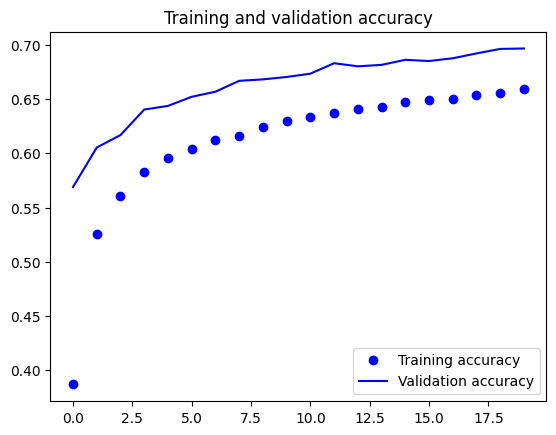

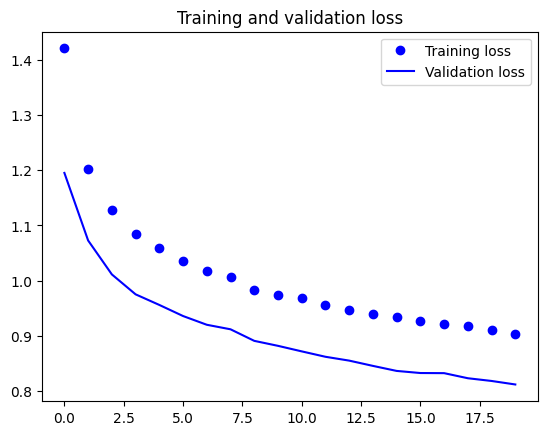

In [213]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [214]:
predicted_classes2 = flower_model.predict(test_X)

386/386 [==============================] - 18s 46ms/step


In [215]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [216]:
predicted_classes.shape, test_Y.shape

((12327,), (12327,))

# Aprendamos de los errores: Qué mejorar

Found 8614 correct labels


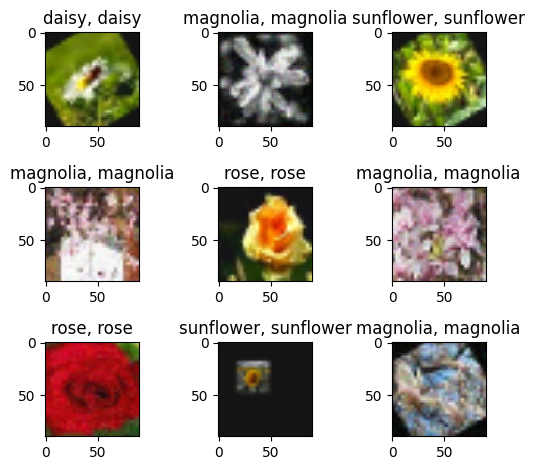

In [217]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(90,90,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 3713 incorrect labels


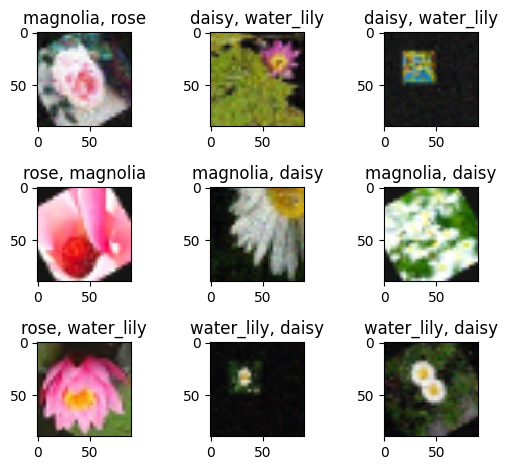

In [218]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(90,90,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [219]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.62      0.68      0.65      2408
     Class 1       0.67      0.71      0.69      2584
     Class 2       0.77      0.76      0.77      2478
     Class 3       0.88      0.93      0.91      2528
     Class 4       0.50      0.39      0.44      2329

    accuracy                           0.70     12327
   macro avg       0.69      0.69      0.69     12327
weighted avg       0.69      0.70      0.69     12327



In [1]:
from keras.models import load_model

# Ruta al modelo guardado
model_path = "flores.h5py"
flower_model = load_model(model_path)

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Ruta de la imagen de entrada
input_image_path = "C:/Users/edgar/OneDrive/Desktop/d1.jpg"
input_image = plt.imread(input_image_path)

# Definir target_shape
target_shape = (90, 90)

# Ajusta al tamaño esperado
input_image = cv2.resize(input_image, target_shape)

# Agrega una dimensión adicional para el lote
input_image = np.array([input_image])

1/1 [==============================] - 0s 133ms/step


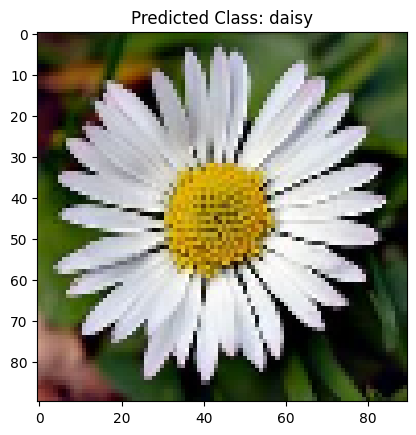

In [3]:
input_image = plt.imread(input_image_path)

# Define las dimensiones esperadas por el modelo
expected_shape = (90, 90)

# Redimensiona la imagen de entrada
resized_image = cv2.resize(input_image, expected_shape)

# Añade la dimensión del lote (batch dimension)
input_image = np.array([resized_image])

# Realiza la predicción
predicted_class_probs = flower_model.predict(input_image)
predicted_class = np.argmax(predicted_class_probs)

# Obtiene el nombre de la clase a partir del número de clase
class_names = {0: 'daisy', 1: 'magnolia', 2: 'rose', 3: 'sunflower', 4: 'water_lily'}  # Ajusta este diccionario según tus nombres de clases
predicted_class_name = class_names.get(predicted_class, 'Desconocido')

# Muestra la imagen y el nombre de la clase predicha
plt.imshow(resized_image)
plt.title("Predicted Class: {}".format(predicted_class_name))
plt.show()
